In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

In [50]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [52]:
from matplotlib import pyplot as plt 
%matplotlib inline

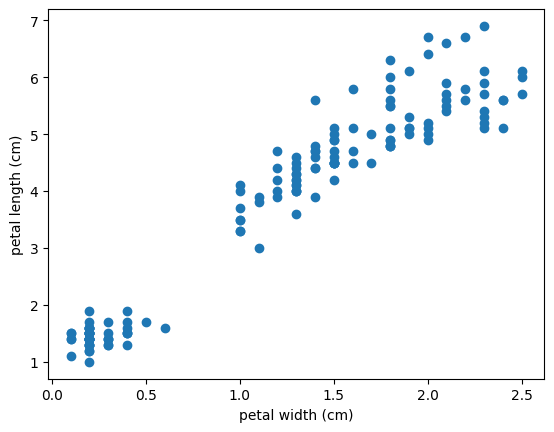

In [53]:
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.scatter(df['petal width (cm)'], df['petal length (cm)'])

In [54]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[['petal width (cm)', 'petal length (cm)']])
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


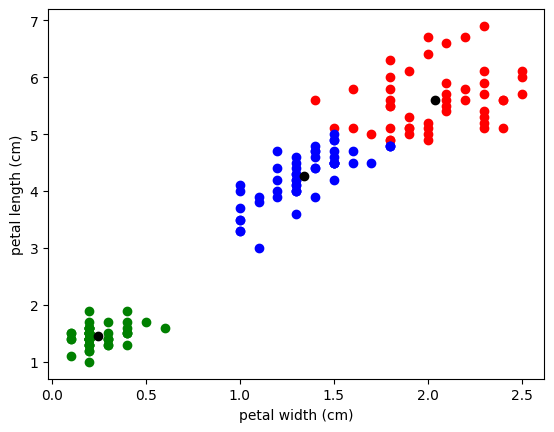

In [55]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.scatter(df0['petal width (cm)'], df0['petal length (cm)'], color='red')
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], color='green')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.copy(deep=True)
scaler.fit(df_scaled[['petal width (cm)']])
df_scaled['petal_width_scaled'] = scaler.transform(df_scaled[['petal width (cm)']])
scaler.fit(df_scaled[['petal length (cm)']])
df_scaled['petal_length_scaled'] = scaler.transform(df_scaled[['petal length (cm)']])
df_scaled = df_scaled[['petal_width_scaled', 'petal_length_scaled']]
df_scaled.head()

,petal_width_scaled,petal_length_scaled
0,0.041667,0.067797
1,0.041667,0.067797
2,0.041667,0.050847
3,0.041667,0.084746
4,0.041667,0.067797


In [57]:
km = KMeans(n_clusters=3)
df_scaled['cluster'] = km.fit_predict(df_scaled[['petal_width_scaled', 'petal_length_scaled']])
df_scaled.head()

,petal_width_scaled,petal_length_scaled,cluster
0,0.041667,0.067797,0
1,0.041667,0.067797,0
2,0.041667,0.050847,0
3,0.041667,0.084746,0
4,0.041667,0.067797,0


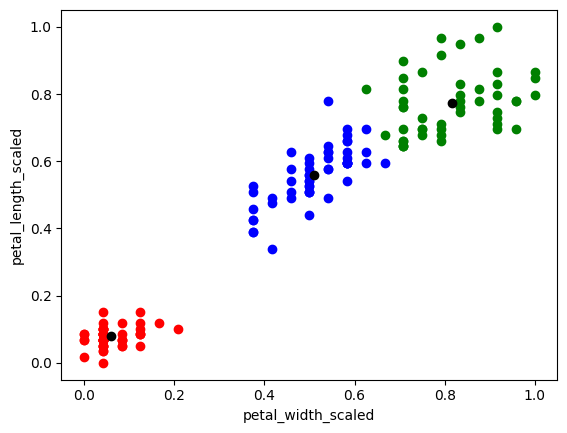

In [58]:
df_scaled0 = df_scaled[df_scaled['cluster']==0]
df_scaled1 = df_scaled[df_scaled['cluster']==1]
df_scaled2 = df_scaled[df_scaled['cluster']==2]

plt.xlabel('petal_width_scaled')
plt.ylabel('petal_length_scaled')
plt.scatter(df_scaled0['petal_width_scaled'], df_scaled0['petal_length_scaled'], color='red')
plt.scatter(df_scaled1['petal_width_scaled'], df_scaled1['petal_length_scaled'], color='green')
plt.scatter(df_scaled2['petal_width_scaled'], df_scaled2['petal_length_scaled'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')

In [59]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[['petal_width_scaled', 'petal_length_scaled']])
    sse.append(km.inertia_)
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.4651961431826686,
 1.0254058768430698,
 0.8017512013860435,
 0.6395588962838015,
 0.5167416063857234,
 0.47138287058268574]

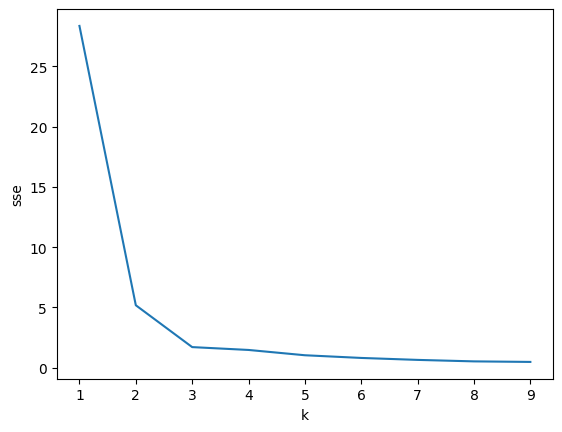

In [60]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_range, sse)